Author: Hyemin Kim
Link: https://hyemin-kim.github.io/2020/08/11/E-Python-LinearRegression-1/
Source: Hyemin Kim
Copyright is owned by the author. For commercial reprints, please contact the author for authorization. For non-commercial reprints, please indicate the source.

# 1. Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\Lecture\\Korea_Univ\\Multi_Variative_data\\02_Multiple_Linear_Regression\\R_Exercise_MLR\\boston\\boston.csv')

In [3]:
# 각 변수의 의미는 다음과 같습니다:
# TOWN: 소속 도시 이름
# LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
# CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)
# CRIM: 지역 범죄율 (per capita crime)
# ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
# INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
# CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
# NOX: 소속 도시의 산화질소 농도
# RM: 해당 지역의 자택당 평균 방 갯수
# AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
# DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
# RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
# TAX: 소속 도시의 10000달러당 재산세
# PTRATIO: 소속 도시의 학생-교사 비율
# B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율
# LSTAT: 해당 지역의 빈곤층 비율

# 2. 데이터 파악 (EDA: 탐색적 데이터 분석)

In [4]:
# 그래프 배경 설정
sns.set_style('darkgrid')



## 2-1. 데이터셋 기본 정보 파악

In [5]:
# shape (dimension)
df.shape

(506, 23)

In [6]:
# 결측치
df.isnull().sum()

ID         0
TOWN       0
TOWNNO     0
TRACT      0
LON        0
LAT        0
x          0
y          0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       506 non-null    float64
 1   TOWN     506 non-null    float64
 2   TOWNNO   506 non-null    float64
 3   TRACT    506 non-null    float64
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   x        506 non-null    float64
 7   y        506 non-null    float64
 8   MEDV     506 non-null    float64
 9   CMEDV    506 non-null    float64
 10  CRIM     506 non-null    float64
 11  ZN       506 non-null    float64
 12  INDUS    506 non-null    float64
 13  CHAS     506 non-null    float64
 14  NOX      506 non-null    float64
 15  RM       506 non-null    float64
 16  AGE      506 non-null    float64
 17  DIS      506 non-null    float64
 18  RAD      506 non-null    float64
 19  TAX      506 non-null    float64
 20  PTRATIO  506 non-null    float64
 21  B        506 non

In [8]:
# numerical variable
df.describe()

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,0.0,47.531621,2700.355731,-71.056389,42.216440,330.263893,4675.644071,22.532806,22.528854,...,0.069170,0.554696,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,146.213884,0.0,27.571401,1380.036830,0.075405,0.061777,6.251767,6.838865,9.197104,9.182176,...,0.253994,0.115877,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,1.000000,0.0,0.000000,1.000000,-71.289500,42.030000,310.850000,4654.550000,5.000000,5.000000,...,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,127.250000,0.0,26.250000,1303.250000,-71.093225,42.180775,327.237500,4671.735000,17.025000,17.025000,...,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,253.500000,0.0,42.000000,3393.500000,-71.052900,42.218100,330.540000,4675.885000,21.200000,21.200000,...,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,379.750000,0.0,78.000000,3739.750000,-71.019625,42.252250,333.390000,4679.595000,25.000000,25.000000,...,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,506.000000,0.0,91.000000,5082.000000,-70.810000,42.381000,350.230000,4693.730000,50.000000,50.000000,...,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# categorical variable
num_town = df['TOWN'].unique()
print(len(num_town))
num_town

1


array([0.])

## 2-2. 종속 변수(목표 변수) 탐색

In [10]:
# >> Target Variable: ‘CMEDV’(주택 가격) 탐색

In [11]:
# 기초 통계량
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

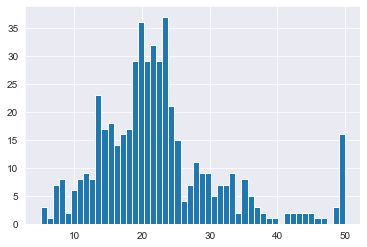

In [12]:
# 분포
df['CMEDV'].hist(bins=50)

In [13]:
# Pandas Function (pandas.DataFrame.boxplot)
# Matplotlib Function (matplotlib.pyplot.boxplot)

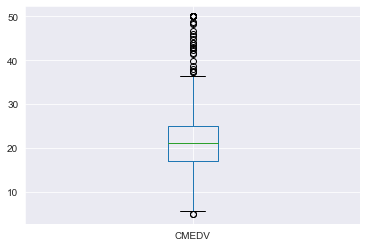

In [14]:
# boxplot - Pandas
df.boxplot(column=['CMEDV'])
plt.show()

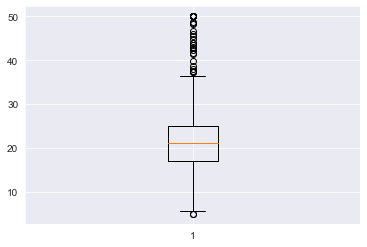

In [15]:
# boxplot - matplotlib
plt.boxplot(df['CMEDV'])
plt.show()

## 2-3. 설명 변수 탐색

In [16]:
# >> 설명 변수의 분포 탐색

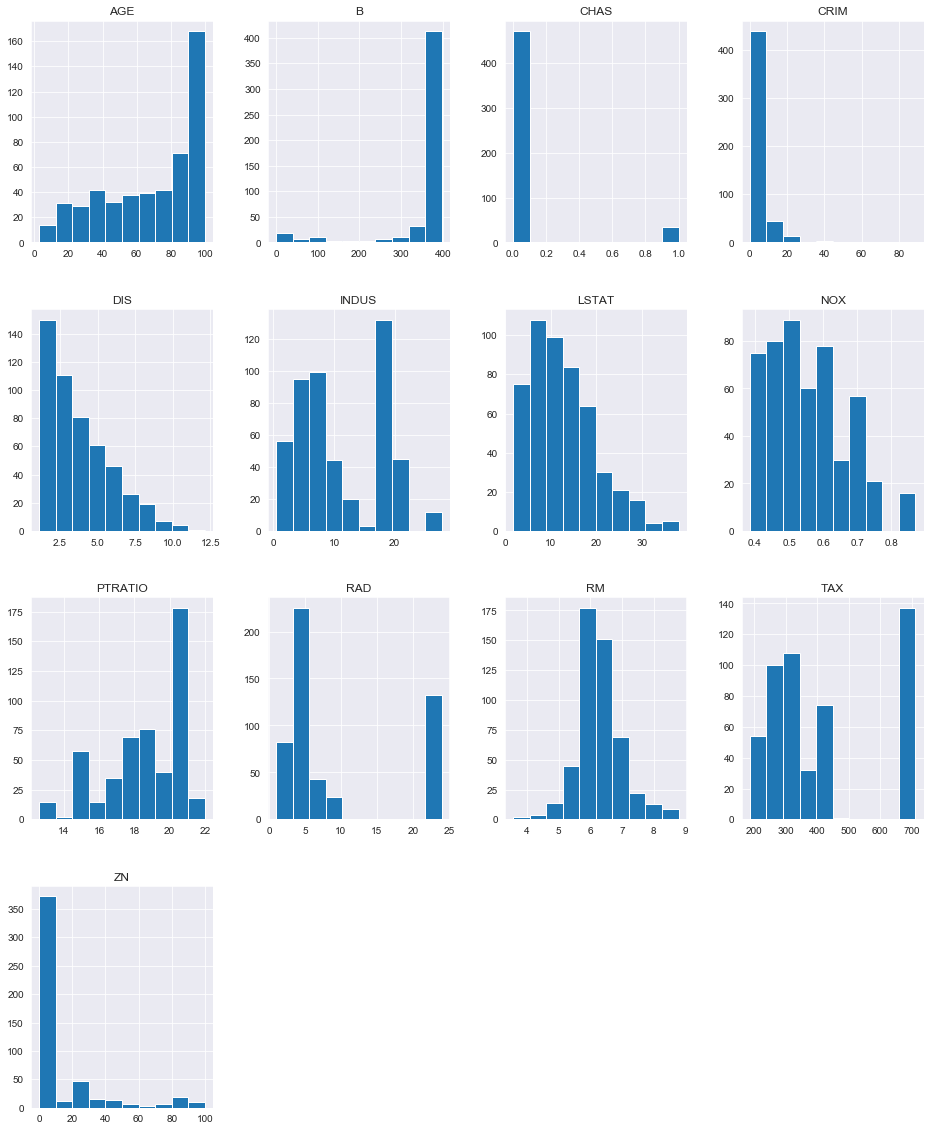

In [17]:
# numerical features (except "LON" & "LAT")
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

df[numerical_columns].hist(ax=ax)
plt.show()

## 2-4. 설명변수와 종속변수 간의 관계 탐색

In [18]:
# Person 상관계수
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr(method = 'pearson')
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429302,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420971,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516612,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091208,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429302,0.420971,-0.516612,0.763651,0.091208,1.000000,-0.302191,0.731467,-0.769232,0.611439,0.668022,0.188926,-0.380051,0.590877
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302191,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731467,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769232,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611439,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [19]:
#상관계수를 좀 더 직관적인 Heatmap으로 표현해볼게요.

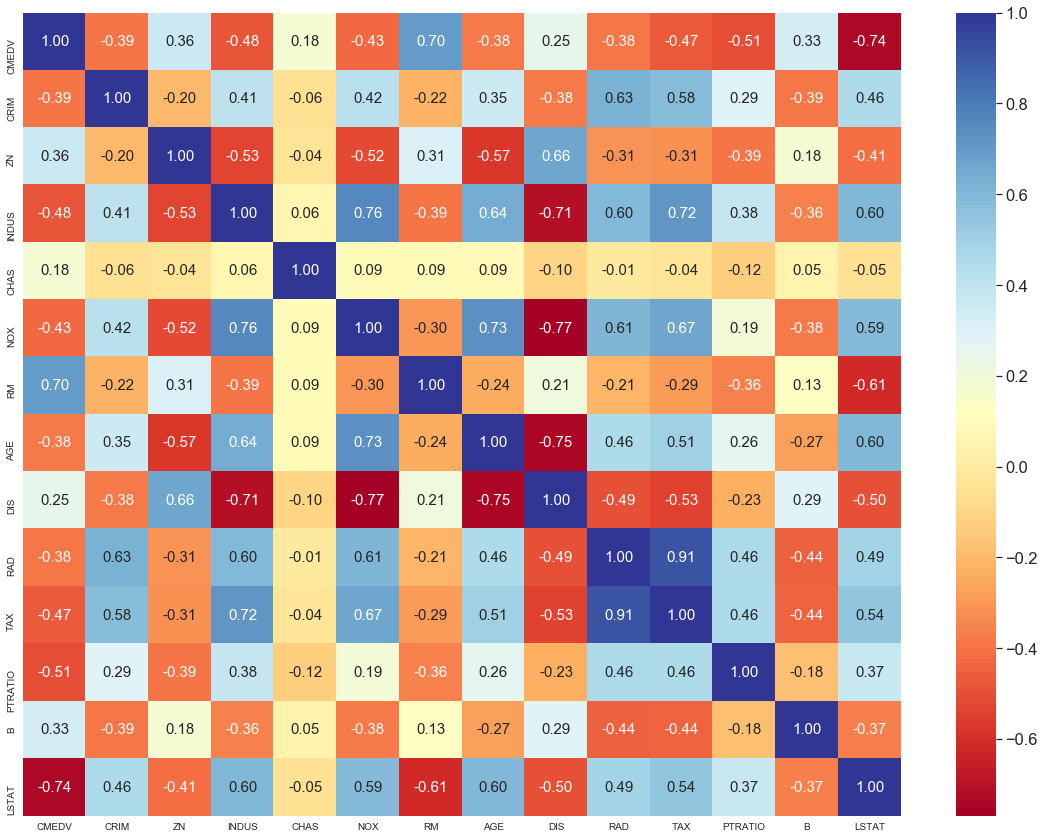

In [20]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [21]:
# 우리의 관심사인 target variable **“CMEDV - 주택 가격”**과 다른 변수간의 상관관계를 살펴보면, 
# **“CMEDV - 주택 가격”**은 “RM - 자택당 평균 방 갯수”(0.7) 및 **“LSTAT - 빈곤층의 비율”(-0.74)**과
# 강한 상관관계를 보이고 있다는 것을 알 수 있음

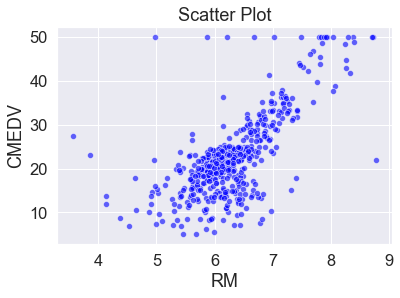

In [22]:
# 주택 가격 ( “CMEDV” ) ~ 방 갯수 ( “RM” )
# scatter plot
sns.scatterplot(data=df, x='RM', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

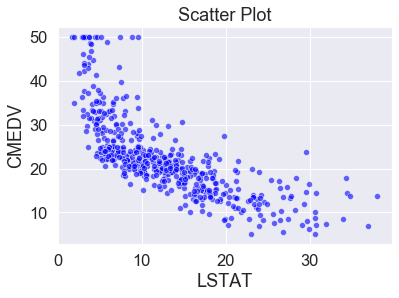

In [23]:
# 주택 가격(“CMEDV”) ~ 빈곤층의 비율(“LSTAT”)
# scatter plot
sns.scatterplot(data=df, x='LSTAT', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

# 3. 주택 가격 예측 모델링: 회귀 분석

In [24]:
# 문자형 변수인 "TOWN"와 범주형 변수인 “CHAS” (Dummy variable)를 제외하여 모든 수치형 변수에 대해서 표준화를 진행합니다.
# feature standardization  (numerical_columns except dummy var.-"CHAS")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [25]:
# features for linear regression model
df[numerical_columns].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,0.0,-0.144223,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0.0,-0.740270,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0.0,-0.740270,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0.0,-0.835292,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0.0,-0.835292,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [26]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

###### 다중공선성
###### 회귀 분석에서 하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면(즉, 다중공선성이 존재하면), 회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링 하기 전에 먼저 다중공선성의 존재 여부를 확인해야합니다.
###### 보통 다중공선성을 판단할 때 VIF값을 확인합니다. 일반적으로, VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, 다중공선성이 존재하는 것으로 판단합니다.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,CRIM,1.7
1,ZN,2.5
2,INDUS,3.8
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,8.1
9,TAX,9.8


## 3-2. 회귀 모델링

In [28]:
# 먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
# 그 다음 도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측합니다. 이 결과는 다중에 실제 “CMEDV” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다

In [29]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

## 3-3. 모델 해석

In [30]:
# >> coefficients 확인하기

In [31]:
# print coef
print(lr.coef_)

[-0.94794173  1.39793373  0.14788896  2.13474891 -2.26006222  2.15877615
  0.12102229 -3.23124666  2.63665942 -1.95958386 -2.05645692  0.65669711
 -3.93702268]


In [32]:
# "feature - coefficients" DataFrame 만들기
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,CRIM,-0.947942
1,ZN,1.397934
2,INDUS,0.147889
3,CHAS,2.134749
4,NOX,-2.260062
5,RM,2.158776
6,AGE,0.121022
7,DIS,-3.231247
8,RAD,2.636659
9,TAX,-1.959584


In [33]:
# 크기 순서로 나열
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
12,LSTAT,-3.937023
7,DIS,-3.231247
8,RAD,2.636659
4,NOX,-2.260062
5,RM,2.158776
3,CHAS,2.134749
10,PTRATIO,-2.056457
9,TAX,-1.959584
1,ZN,1.397934
0,CRIM,-0.947942


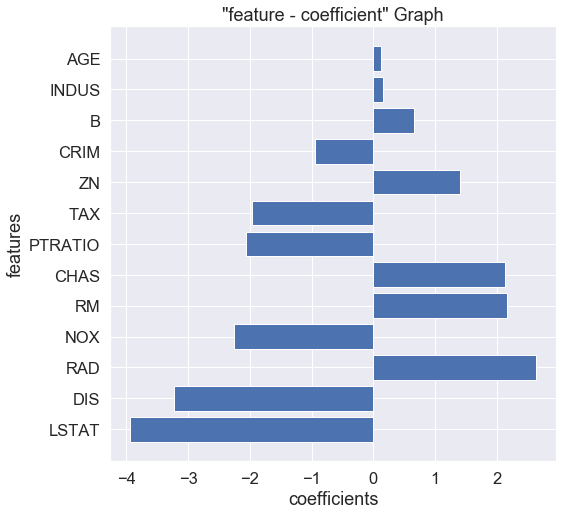

In [34]:
## coefficients 시각화

# figure size
plt.figure(figsize = (8, 8))

# bar plot
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [35]:
# >> feature 유의성 검정
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.86
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          1.72e-103
Time:                        03:27:31   Log-Likelihood:                -1191.9
No. Observations:                 404   AIC:                             2412.
Df Residuals:                     390   BIC:                             2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4313      0.245     91.399      0.000      21.949      22.914
CRIM          -0.9479      0.290     -3.263      0.001      -1.519      -0.377
ZN             1.3979      0.372      3.758      0.000       0.667       2.129
INDUS          0.1479      0.458      0.323      0.747      -0.753       1.049
CHAS           2.1347      0.899      2.375      0.018       0.367       3.902
NOX           -2.2601      0.490     -4.617      0.000      -3.222      -1.298
RM             2.1588      0.332      6.495      0.000       1.505       2.812
AGE            0.1210      0.415      0.292      0.771      -0.695       0.937
DIS           -3.2312      0.477     -6.774      0.000      -4.169      -2.293
RAD            2.6367      0.671      3.931      0.000       1.318       3.955
TAX           -1.9596      0.731     -2.679      0.008      -3.398      -0.522
PTRATIO       -2.0565      0.319     -6.447      0.000      -2.684      -1.429
B              0.6567      0.272      2.414      0.016       0.122       1.191
LSTAT         -3.9370      0.405     -9.723      0.000      -4.733      -3.141
==============================================================================
Omnibus:                      169.951   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.001
Skew:                           1.762   Prob(JB):                    2.95e-187
Kurtosis:                       9.213   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

# >> 주택 가격 영향 요소

# 위 결과를 종합해 보면, 주택 가격의 영향 요소에 관하여 다음과 같은 결론들을 도출할 수 있습니다:

# "INDUS"(상업적 비즈니스에 활용되지 않는 농지 면적)과 “AGE”(1940년 이전에 건설된 비율)은 유의하지 않습니다. (p value > 0.05)

# "ZN"(25,000 제곱 피트(sq.ft) 이상의 주택지 비율),
# "CHAS"(Charles 강과 접하고 있는지 여부),
# "RM"(자택당 평균 방 갯수),
# "RAD"(소속 도시가 Radial 고속도로와의 접근성 지수),
# "B"(흑인 지수)는
# 주택 가격에 Positive한 영향을 미칩니다.
# 즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 클수록 주택의 가격이 높을 것입니다.

# "CRIM"(지역 범죄율),
# "NOX"(산화질소 농도),
# "DIS"(보스턴 고용 센터와의 거리),
# "TAX"(재산세),
# "PTRATIO"(학생-교사 비율),
# "LSTAT"(빈곤층 비율)은
# 주택 가격에 Negative한 영향을 미칩니다.
# 즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 작을수록 주택의 가격이 높을 것입니다.

## 3-4. 모델 예측 결과 및 성능 평가

In [37]:
# >> 예측 결과 시각화

# 학습한 모델을 Test set에 적용하여 y값(“CMEDV”)을 예측합니다.
# 예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화해보겠습니다.

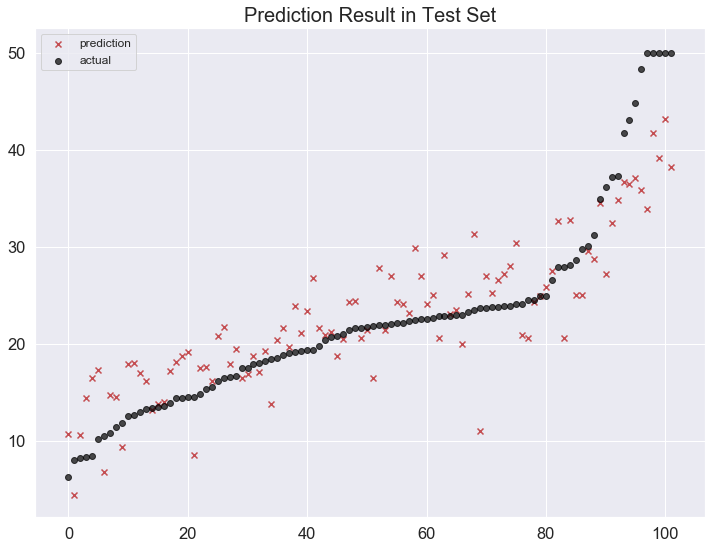

In [38]:
# 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [39]:
# R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7341842866747395
0.7639603298024278


In [40]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.624042357117673
4.829822400041738
